In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
# 架空のデータを用意します。
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=4,
                  random_state=8, cluster_std=2.4)

In [3]:
X

array([[  8.031223  ,   1.07684647],
       [  0.79275323,  -8.49270872],
       [ -6.24741713,  -2.80979462],
       [  7.1350517 ,  -0.27620621],
       [  8.75371186,  12.16955042],
       [ -6.52850085,  -4.81571386],
       [ -5.68423308,  -8.6536682 ],
       [ -4.40557029, -10.14011553],
       [ -7.18713979,  -8.49782188],
       [  7.67125718,  15.33780796],
       [  7.05472091,   2.71136019],
       [ -6.44972594,  -8.50218035],
       [  7.3175591 ,   8.07104895],
       [  9.435827  ,  12.60240072],
       [ -3.94302873,  -8.45858333],
       [ -5.82070544, -11.54252584],
       [  5.45439833,  10.04943649],
       [  1.23496178,  -4.95053236],
       [  0.99142387,  -0.34084278],
       [ -4.89204127,  -6.95668615],
       [  6.09686891,   6.03480565],
       [ -0.70549841,  -3.44748449],
       [ -0.18012153,  -2.11546643],
       [ -3.20156642, -10.44698102],
       [  0.95069301,  -2.56593727],
       [ -0.75648703,   0.73537406],
       [ -0.74705664,   1.54560469],
 

In [4]:
y

array([1, 2, 2, 1, 0, 3, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 3, 3, 2, 0, 3,
       3, 2, 3, 3, 3, 1, 2, 0, 2, 3, 3, 2, 1, 0, 3, 0, 2, 1, 2, 1, 0, 3,
       1, 3, 0, 0, 0, 2, 1, 3, 1, 0, 0, 3, 2, 0, 2, 3, 0, 0, 0, 2, 0, 0,
       1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 3, 2, 1, 2, 2, 2, 0, 2,
       1, 0, 0, 3, 1, 2, 0, 1, 3, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 3, 0, 3,
       0, 3, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 3, 2, 0, 1, 3, 1,
       2, 1, 3, 1, 1, 3, 3, 3, 0, 1, 2, 0, 1, 0, 2, 1, 3, 2, 1, 2, 3, 3,
       2, 0, 3, 2, 3, 3, 1, 0, 2, 3, 2, 0, 0, 3, 0, 1, 3, 2, 0, 0, 0, 2,
       3, 3, 0, 1, 2, 3, 2, 0, 1, 1, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 3, 3,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 3, 3, 3, 1, 3, 0, 3, 1,
       0, 3, 1, 0, 2, 0, 1, 2, 3, 0, 1, 3, 2, 0, 1, 3, 3, 1, 3, 2, 1, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 3, 2, 1, 2, 2, 1, 0, 1, 2, 3, 3, 0, 2,
       2, 0, 1, 0, 2, 3, 3, 0, 0, 3, 1, 1, 0, 3, 3, 0, 1, 2, 0, 0, 0, 2,
       3, 2, 1, 0, 3, 3, 2, 3, 1, 0, 0, 3, 3, 0, 3,

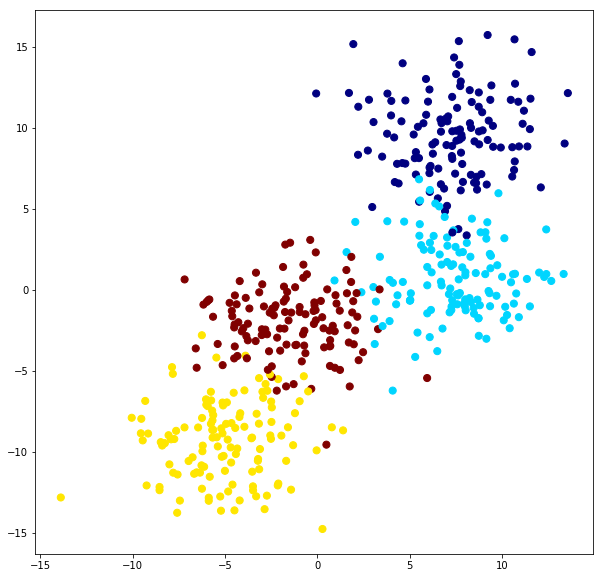

In [5]:
#Scatter plot the points
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    決定木の可視化をします。
    INPUTS: 分類モデル, X, y, optional x/y limits.
    OUTPUTS: Meshgridを使った決定木の可視化
    '''
    # fitを使ったモデルの構築
    classifier.fit(X, y)
    
    # 軸を自動調整
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # meshgridをつくります。
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # 分類器の予測をZとして保存
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # meshgridを使って、整形します。
    Z = Z.reshape(xx.shape)
    
    # 分類ごとに色を付けます。
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    
    # 訓練データも描画します。
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        境界線を描き込みます。
        '''
        if i < 0:
            return

        tree = classifier.tree_
        
        # 境界を描画するために、再帰的に呼び出します。
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

In [15]:
# モデルを作ります。
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

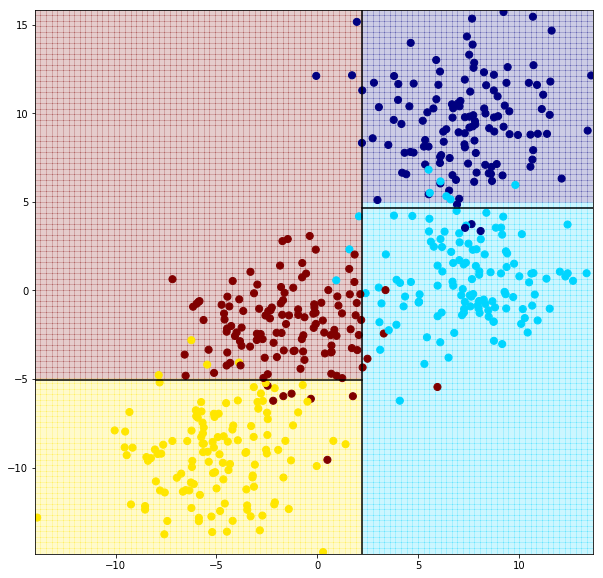

In [16]:
# 描画します。
visualize_tree(clf,X,y)

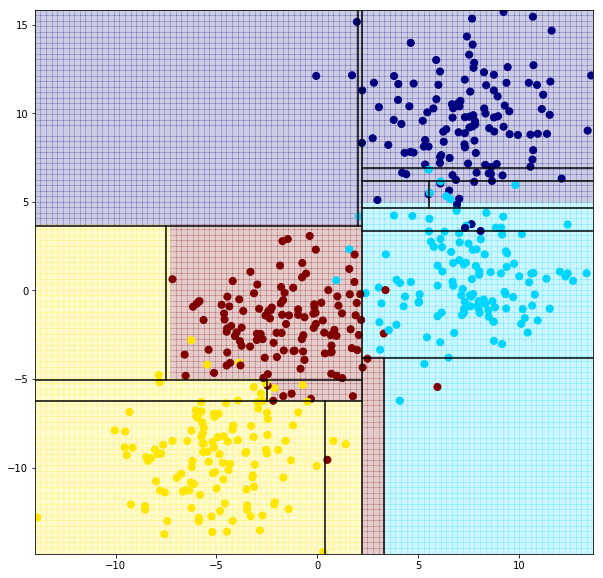

In [18]:
clf = DecisionTreeClassifier(max_depth=4,random_state=0)

visualize_tree(clf,X,y)

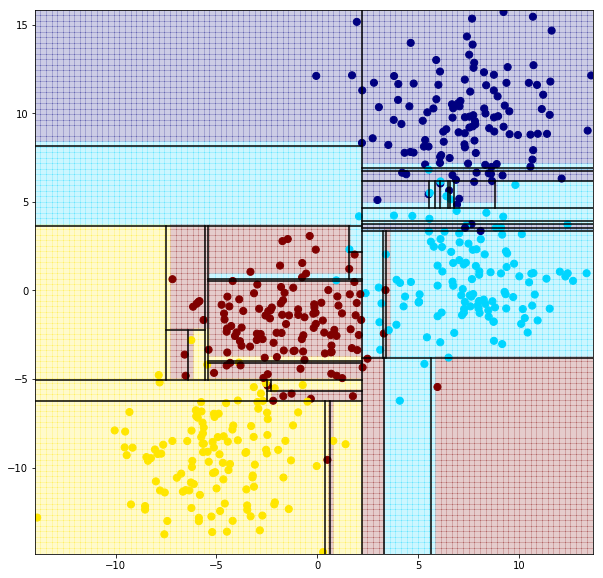

In [20]:
clf = DecisionTreeClassifier(max_depth=10,random_state=0)

visualize_tree(clf,X,y)

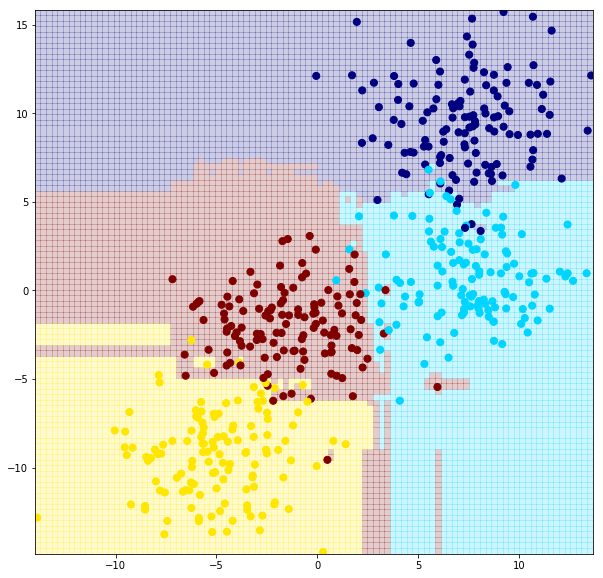

In [25]:
from sklearn.ensemble import RandomForestClassifier

# n_estimatorsは、作る木の数です。
clf = RandomForestClassifier(n_estimators=100,random_state=0)

# 境界線を書かないようにします。
visualize_tree(clf,X,y,boundaries=False)

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
x = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2):
    '''
    大きな波＋小さな波＋ノイズからなるダミーデータです。
    '''
   
    noise = sigma * np.random.randn(len(x))

    return np.sin(5 * x) + np.sin(0.5 * x) + noise

<ErrorbarContainer object of 3 artists>

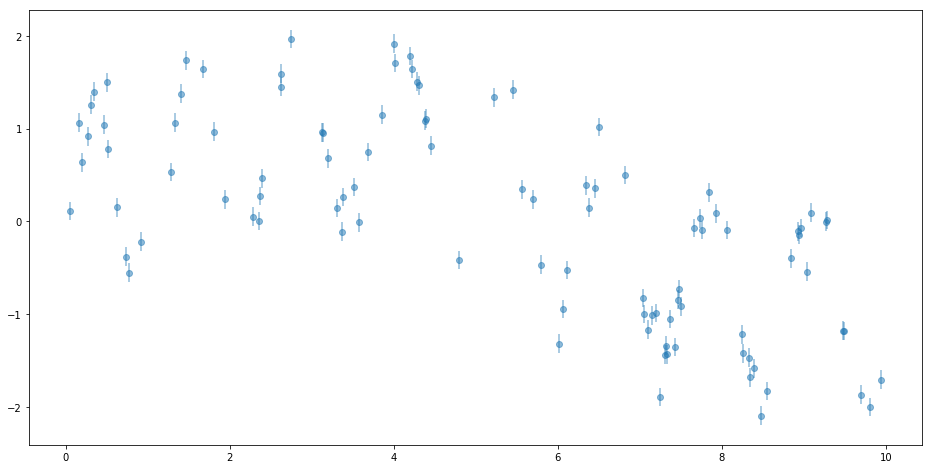

In [53]:
# xからyを計算
y = sin_model(x)

# Plotします。
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o', alpha=0.5)

In [54]:
# X を用意します。
xfit = np.linspace(0, 10, 1000)

In [55]:
# 回帰モデルを用意します。
rfr = RandomForestRegressor(100)

# モデルを学習させます。
rfr.fit(x[:, None], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
# 予測値を計算します。
yfit = rfr.predict(xfit[:, None])

In [57]:
# 実際の値です。
ytrue = sin_model(xfit, 0)

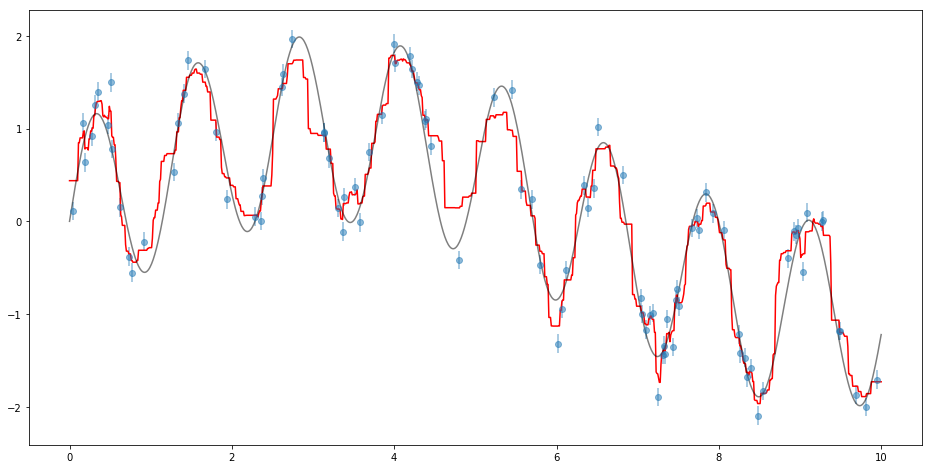

In [58]:
# Plot します
plt.figure(figsize=(16,8))

plt.errorbar(x, y, 0.1, fmt='o', alpha=0.5)

plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);